In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pandas as pd 
import numpy as np

In [6]:
DATA_SOURCE = "../data_assets/csv_files/"
student_df = pd.read_csv(f"{DATA_SOURCE}students_data.csv")
student_historical_df = pd.read_csv(f"{DATA_SOURCE}student_historical_results.csv")
student_info = pd.read_csv(f"{DATA_SOURCE}student_more_info.csv")
jamb_result = pd.read_csv(f"{DATA_SOURCE}jamb_results.csv")
wassce_results = pd.read_csv(f"{DATA_SOURCE}wassce_results.csv")
stud_results = pd.read_csv(f"{DATA_SOURCE}student_results.csv")

student_df['Clubs'] = student_df['Clubs'].str.replace(r'[\{\}]', '', regex=True)

print(student_df.isnull().sum())
print(student_historical_df.isnull().sum())
print(student_info.isnull().sum())
print(jamb_result.isnull().sum())
print(wassce_results.isnull().sum())

Student_ID             0
Gender                 0
DOB                    0
Age                    0
Class_Grade_ID         0
Discipline_ID          0
State_Of_Origin        0
Year_Of_Admission      0
Sports_House           0
Religion               0
Disability             0
Parent_Income_Level    0
Class_Prefect          0
Aspiring_Profession    0
Clubs                  0
dtype: int64
Student_ID    0
Grade         0
Session       0
Subject       0
Score         0
Score_Type    0
dtype: int64
Student_ID             0
Attendance_Rate        0
Study_Hours            0
Subject_Struggle       0
Struggle_Scale         0
Class_Enjoyment        0
Understanding_Level    0
dtype: int64
Student_ID          0
JAMB_Year           0
Admission_Year      0
JAMB_Score          0
English             0
Mathematics         0
Physics           288
Biology           377
Literature        306
Government        306
Chemistry         361
Accounting        306
Economics         306
dtype: int64
Student_ID      

In [11]:
grade_3_students = student_df[student_df['Class_Grade_ID'] == 3]

merged_df = stud_results.merge(
    grade_3_students[['Student_ID', 'Discipline_ID', 'Disability', 'Parent_Income_Level', 'Class_Prefect']],
    on='Student_ID',
    how='right'
)

print(merged_df.head())


                             Student_ID  Class_Grade_ID  Session  \
0  b8600009-f100-4a9f-97d5-6cc3b360e886               3        1   
1  b8600009-f100-4a9f-97d5-6cc3b360e886               3        1   
2  b8600009-f100-4a9f-97d5-6cc3b360e886               3        1   
3  b8600009-f100-4a9f-97d5-6cc3b360e886               3        1   
4  b8600009-f100-4a9f-97d5-6cc3b360e886               3        1   

           Subject  Score  Discipline_ID Disability Parent_Income_Level  \
0          English  65.76              2         No        Middle Class   
1            Maths  82.94              2         No        Middle Class   
2  Civic Education  71.14              2         No        Middle Class   
3              ICT  52.91              2         No        Middle Class   
4        Economics  49.17              2         No        Middle Class   

  Class_Prefect  
0            No  
1            No  
2            No  
3            No  
4            No  


In [57]:
grade_3_students = student_df[student_df['Class_Grade_ID'] == 3]

historical_results = student_historical_df.merge(
    grade_3_students[['Student_ID', 'Discipline_ID', 'Disability', 'Parent_Income_Level', 'Class_Prefect']],
    on='Student_ID',
    how='right'
)

print(historical_results.head())


                             Student_ID  Grade  Session          Subject  \
0  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1          English   
1  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1            Maths   
2  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1  Civic Education   
3  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1              ICT   
4  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1        Economics   

   Score Score_Type  Discipline_ID Disability Parent_Income_Level  \
0  65.76    Current              2         No        Middle Class   
1  82.94    Current              2         No        Middle Class   
2  71.14    Current              2         No        Middle Class   
3  52.91    Current              2         No        Middle Class   
4  49.17    Current              2         No        Middle Class   

  Class_Prefect  
0            No  
1            No  
2            No  
3            No  
4            No  


In [77]:
# Step 1: Calculate the average score for each student and each subject
avg_scores_by_subject = historical_results.groupby(['Student_ID', 'Subject'])['Score'].mean().reset_index()

# Step 2: Merge Discipline_ID into the average score DataFrame
avg_scores_with_discipline = avg_scores_by_subject.merge(
    student_df[['Student_ID', 'Discipline_ID']], on='Student_ID', how='left'
)

# Step 3: Define subject sets for each discipline
art_subjects = ['English', 'Maths', 'Literature', 'Government']
commercial_subjects = ['English', 'Maths', 'Accounting', 'Economics']
science_subjects = ['English', 'Maths', 'Chemistry', 'Biology']
tech_subjects =['English', 'Maths', 'Physics', 'Chemistry']

# Step 4: Calculate the sum of average scores for each discipline
# For Art (Discipline_ID = 1)
art_students = avg_scores_with_discipline[
    (avg_scores_with_discipline['Discipline_ID'] == 1) &
    (avg_scores_with_discipline['Subject'].isin(art_subjects))
]
art_sum_scores = art_students.groupby('Student_ID')['Score'].sum().reset_index()
art_sum_scores.rename(columns={'Score': 'Average_Synthetic_Score'}, inplace=True)

# For Commercial (Discipline_ID = 2)
commercial_students = avg_scores_with_discipline[
    (avg_scores_with_discipline['Discipline_ID'] == 2) &
    (avg_scores_with_discipline['Subject'].isin(commercial_subjects))
]
commercial_sum_scores = commercial_students.groupby('Student_ID')['Score'].sum().reset_index()
commercial_sum_scores.rename(columns={'Score': 'Average_Synthetic_Score'}, inplace=True)

# For Science (Discipline_ID = 3)
science_students = avg_scores_with_discipline[
    (avg_scores_with_discipline['Discipline_ID'] == 3) &
    (avg_scores_with_discipline['Subject'].isin(science_subjects))
]
science_sum_scores = science_students.groupby('Student_ID')['Score'].sum().reset_index()
science_sum_scores.rename(columns={'Score': 'Average_Synthetic_Score'}, inplace=True)

# For Science (Discipline_ID = 3)
tech_students = avg_scores_with_discipline[
    (avg_scores_with_discipline['Discipline_ID'] == 3) &
    (avg_scores_with_discipline['Subject'].isin(tech_subjects))
]
tech_sum_scores = tech_students.groupby('Student_ID')['Score'].sum().reset_index()
tech_sum_scores.rename(columns={'Score': 'Average_Synthetic_Score'}, inplace=True)



In [84]:
historical_results.head()

Student_ID  Grade  Session          Subject  \
0  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1          English   
1  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1            Maths   
2  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1  Civic Education   
3  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1              ICT   
4  b8600009-f100-4a9f-97d5-6cc3b360e886      3        1        Economics   

   Score Score_Type  Discipline_ID Disability Parent_Income_Level  \
0  65.76    Current              2         No        Middle Class   
1  82.94    Current              2         No        Middle Class   
2  71.14    Current              2         No        Middle Class   
3  52.91    Current              2         No        Middle Class   
4  49.17    Current              2         No        Middle Class   

  Class_Prefect  
0            No  
1            No  
2            No  
3            No  
4            No

In [85]:
student_infos = historical_results[['Student_ID', 'Discipline_ID', 'Disability', 'Parent_Income_Level']].drop_duplicates()


student_infos = student_infos.merge(art_sum_scores, on='Student_ID', how='left', suffixes=('', '_Art'))
student_infos = student_infos.merge(commercial_sum_scores, on='Student_ID', how='left', suffixes=('', '_Commercial'))
student_infos = student_infos.merge(science_sum_scores, on='Student_ID', how='left', suffixes=('', '_Science'))
student_infos = student_infos.merge(tech_sum_scores, on='Student_ID', how='left', suffixes=('', '_Tech'))


student_infos['Average_Synthetic_Score'] = student_infos[['Average_Synthetic_Score', 'Average_Synthetic_Score_Commercial', 'Average_Synthetic_Score_Science']].sum(axis=1)

student_infos.drop(columns=['Average_Synthetic_Score_Commercial', 'Average_Synthetic_Score_Science'], inplace=True)

student_infos.isna().sum()


student_infos.head()

Student_ID  Discipline_ID Disability  \
0  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   
1  00a48c20-79d3-4a5a-bfa0-5d760089cd0b              3         No   
2  e46b6df3-8312-4543-ad62-ac725762936a              2         No   
3  cfb67788-e935-40ff-93cc-36f3b01939d3              2        Yes   
4  6dc03cd8-261a-470a-91d8-5e597bc08839              2         No   

  Parent_Income_Level  Average_Synthetic_Score  Average_Synthetic_Score_Tech  
0        Middle Class               253.456772                           NaN  
1        Middle Class               264.131828                    254.354048  
2        Middle Class               225.844069                           NaN  
3        Middle Class               296.345186                           NaN  
4        Middle Class               295.775795                           NaN

In [86]:
student_infos.drop(columns=['Average_Synthetic_Score_Tech'], inplace=True)

In [88]:
student_info['Study_Hours_Bin'] = pd.cut(student_info['Study_Hours'], bins=[0, 1, 3, 5, 10], labels=['Low', 'Medium', 'High', 'Very High'])
student_infos = student_infos.merge(student_info[['Student_ID',
                                                   'Study_Hours', 'Struggle_Scale', 'Class_Enjoyment',
                                                     'Attendance_Rate', 'Study_Hours_Bin', "Understanding_Level"]], on='Student_ID', how='left')


In [89]:
student_infos.head(2)

Student_ID  Discipline_ID Disability  \
0  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   
1  00a48c20-79d3-4a5a-bfa0-5d760089cd0b              3         No   

  Parent_Income_Level  Average_Synthetic_Score  Study_Hours  Struggle_Scale  \
0        Middle Class               253.456772            1               5   
1        Middle Class               264.131828            1               2   

   Class_Enjoyment  Attendance_Rate Study_Hours_Bin  Understanding_Level  
0                4             0.99             Low                    4  
1                1             0.90             Low                    5

In [90]:
student_infos.describe()

Discipline_ID  Average_Synthetic_Score  Study_Hours  Struggle_Scale  \
count     478.000000               478.000000   478.000000      478.000000   
mean        2.002092               256.735142     3.027197        2.953975   
std         0.833016                42.453487     1.420608        1.460154   
min         1.000000               153.051788     1.000000        1.000000   
25%         1.000000               226.308965     2.000000        2.000000   
50%         2.000000               260.471532     3.000000        3.000000   
75%         3.000000               290.069940     4.000000        4.000000   
max         3.000000               354.180762     5.000000        5.000000   

       Class_Enjoyment  Attendance_Rate  Understanding_Level  
count       478.000000       478.000000           478.000000  
mean          3.000000         0.846360             3.119247  
std           1.427493         0.085083             1.324026  
min           1.000000         0.700000             1.000000  
25%           2.000000         0.772500             2.000000  
50%           3.000000         0.850000             3.000000  
75%           4.000000         0.920000             4.000000  
max           5.000000         1.000000             5.000000

In [92]:
student_infos['Parent_Income_Level'].unique()

array(['Middle Class', 'Low', 'Upper Class'], dtype=object)

In [98]:
study_hour_mapping = {
    'Low': 1,   
    'Medium': 2,
    'High': 3,
    'Very High': 4
}

income_mapping = {
    'Low':1,
    'Middle Class': 2,
    'Upper Class': 3

}

disability_mapping = {
    'No': 0,
    'Yes': 1
}


student_infos['Study_Hours_Num'] = student_infos['Study_Hours_Bin'].map(study_hour_mapping)
student_infos['Parent_Income_Level_Num'] = student_infos['Parent_Income_Level'].map(income_mapping)
student_infos["Disability_Num"] = student_infos["Disability"].map(disability_mapping)

In [94]:
def assign_discipline(row):
    # Check if required subjects for Arts have non-NaN values
    if pd.notna(row['English']) and pd.notna(row['Mathematics']) and pd.notna(row['Literature']) and pd.notna(row['Government']):
        return 1  # Arts
    # Check if required subjects for Commercial have non-NaN values
    elif pd.notna(row['English']) and pd.notna(row['Mathematics']) and pd.notna(row['Accounting']) and pd.notna(row['Economics']):
        return 2  # Commercial
    # Check if required subjects for Science have non-NaN values
    elif pd.notna(row['English']) and pd.notna(row['Mathematics']) and pd.notna(row['Physics']) and pd.notna(row['Chemistry']):
        return 3  # Science
    elif pd.notna(row['English']) and pd.notna(row['Mathematics']) and pd.notna(row['Physics']) and (pd.notna(row['Chemistry']) or pd.notna(row['Biology'])):
        return 3  # Science (with Biology as an option)
    else:
        return np.nan  # Undefined/Other

jamb_result['Discipline_ID'] = jamb_result.apply(assign_discipline, axis=1)

modified_jamb_df = jamb_result.copy()

print(modified_jamb_df[['Student_ID', 'JAMB_Score', 'English', 'Mathematics', 'Literature', 'Government', 'Accounting', 'Economics', 'Physics', 'Chemistry', 'Biology', 'Discipline_ID']].head())

                             Student_ID  JAMB_Score  English  Mathematics  \
0  6978c7b0-be37-4fbd-8387-f5667294e83a      243.95    88.30        78.71   
1  e922cc06-04ff-499f-97e0-b1be9328fe3a      203.79    43.90        64.88   
2  a5b72b1d-f854-4f0a-aa58-65c03eee18ec      229.80    71.30        93.28   
3  aa78f8a0-f44f-452a-978c-af1f050e25d6      225.19    76.51        52.50   
4  42c43aa5-6182-4b54-b9b3-de843999c3df      270.06    46.09        85.46   

   Literature  Government  Accounting  Economics  Physics  Chemistry  Biology  \
0         NaN         NaN         NaN        NaN    32.70        NaN    68.17   
1       53.15       50.38         NaN        NaN      NaN        NaN      NaN   
2         NaN         NaN         NaN        NaN    54.45      60.26      NaN   
3         NaN         NaN         NaN        NaN    54.89      58.60      NaN   
4       75.95       74.86         NaN        NaN      NaN        NaN      NaN   

   Discipline_ID  
0              3  
1           

In [133]:
average_jamb_scores = modified_jamb_df.groupby('Student_ID')['JAMB_Score'].mean().reset_index()
average_jamb_scores.rename(columns={'JAMB_Score': 'Avg_JAMB_Score'}, inplace=True)

# Merge the average JAMB scores back into the student_jamb
student_jamb = student_infos.merge(modified_jamb_df, on='Discipline_ID', how='left')



In [121]:
student_jamb.head()

Student_ID_x  Discipline_ID Disability  \
0  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   
1  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   
2  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   
3  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   
4  b8600009-f100-4a9f-97d5-6cc3b360e886              2         No   

  Parent_Income_Level  Average_Synthetic_Score  Study_Hours  Struggle_Scale  \
0        Middle Class               253.456772            1               5   
1        Middle Class               253.456772            1               5   
2        Middle Class               253.456772            1               5   
3        Middle Class               253.456772            1               5   
4        Middle Class               253.456772            1               5   

   Class_Enjoyment  Attendance_Rate Study_Hours_Bin  ...  JAMB_Score  English  \
0                4             0.99             Low  ...      337.00    92.26   
1                4             0.99             Low  ...      335.12    50.98   
2                4             0.99             Low  ...      262.28    46.99   
3                4             0.99             Low  ...      224.75    43.31   
4                4             0.99             Low  ...      235.20    35.69   

   Mathematics Physics Biology  Literature  Government  Chemistry  Accounting  \
0        77.92     NaN     NaN         NaN         NaN        NaN       63.77   
1        72.82     NaN     NaN         NaN         NaN        NaN       86.02   
2        32.52     NaN     NaN         NaN         NaN        NaN       84.24   
3        68.70     NaN     NaN         NaN         NaN        NaN       52.09   
4        61.50     NaN     NaN         NaN         NaN        NaN       85.02   

   Economics  
0      71.75  
1      90.50  
2      86.90  
3      67.94  
4      68.17  

[5 rows x 27 columns]

In [134]:
# Create a synthetic target variable using the average JAMB score for the student's discipline
student_jamb['Synthetic_JAMB_Score'] = student_jamb['JAMB_Score'] * (student_jamb['Average_Synthetic_Score'] / student_jamb['Average_Synthetic_Score'].max())  # Normalize Avg_Score for scaling

# Features
features = ['Average_Synthetic_Score',  'Attendance_Rate', 'Study_Hours_Num', 'Struggle_Scale', 'Understanding_Level', 'Parent_Income_Level_Num', 'Disability_Num']  # Adjust as needed
target = 'Synthetic_JAMB_Score'

# Split data into training and testing sets
X = student_jamb[features]
y = student_jamb[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1089.12


In [138]:
student_jamb = student_jamb.drop_duplicates(subset="Student_ID_x")

In [139]:
# Predict scores for all students
student_jamb['Predicted_JAMB_Score'] = model.predict(student_jamb[features])

# Identify students likely to underperform
at_risk_students = student_jamb[student_jamb['Predicted_JAMB_Score'] < 200]
print(at_risk_students[['Student_ID_x', 'Predicted_JAMB_Score', 'Average_Synthetic_Score']])

# Suggest interventions
for index, student in at_risk_students.iterrows():
    print(f"Student ID: {student['Student_ID_x']} - Suggested Interventions: Personalized tutoring and increase study hours.")


                               Student_ID_x  Predicted_JAMB_Score  \
0      b8600009-f100-4a9f-97d5-6cc3b360e886            180.702183   
144    00a48c20-79d3-4a5a-bfa0-5d760089cd0b            177.113308   
306    e46b6df3-8312-4543-ad62-ac725762936a            160.906318   
738    7efdd784-3b7f-4c5c-86ee-7c3d67de4afd            156.795721   
882    66c44cb7-bd6c-4581-8c13-6c3d400ffdf4            168.873829   
...                                     ...                   ...   
70434  142f58d5-c8c3-4d7c-aff6-d357224e979a            184.486911   
70578  b18b7352-f8ff-4009-a57a-6db425b9b529            187.210119   
70740  fbaff4a6-18db-40d1-80c9-f252138fa96f            196.136008   
70884  081c767b-30af-48af-9231-5e424046cec9            186.752166   
71352  f40378a4-ddc4-4a6b-855e-cdbcbec88a4b            182.295633   

       Average_Synthetic_Score  
0                   253.456772  
144                 264.131828  
306                 225.844069  
738                 229.749577  
882   

In [128]:
# Tried Linear Regression with stand scaling normalization 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


features = ['Average_Synthetic_Score', 'Attendance_Rate', 'Study_Hours_Num', 
            'Struggle_Scale', 'Understanding_Level', 'Parent_Income_Level_Num', 'Disability_Num']
target = 'Synthetic_JAMB_Score'

X = student_jamb[features]
y = student_jamb[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model using Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)


mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


Mean Squared Error: 1091.96


In [130]:
# Step 1: Predict JAMB scores for all students using the trained model
student_jamb['Predicted_JAMB_Score'] = model.predict(scaler.transform(student_jamb[features]))

# Step 2: Identify students likely to underperform
at_risk_students = student_jamb[student_jamb['Predicted_JAMB_Score'] < 200]

# Step 3: Display at-risk students with their predicted and average scores
print(at_risk_students[['Student_ID_x', 'Predicted_JAMB_Score']])

# Step 4: Suggest interventions for at-risk students
for index, student in at_risk_students.iterrows():
    print(f"Student ID: {student['Student_ID_x']} - Suggested Interventions: Personalized tutoring and increased study hours.")


                               Student_ID_x  Predicted_JAMB_Score
0      b8600009-f100-4a9f-97d5-6cc3b360e886            175.787224
1      b8600009-f100-4a9f-97d5-6cc3b360e886            175.787224
2      b8600009-f100-4a9f-97d5-6cc3b360e886            175.787224
3      b8600009-f100-4a9f-97d5-6cc3b360e886            175.787224
4      b8600009-f100-4a9f-97d5-6cc3b360e886            175.787224
...                                     ...                   ...
71653  ee9112ea-7d6e-4f8f-82e6-2933cacae8fa            197.923325
71654  ee9112ea-7d6e-4f8f-82e6-2933cacae8fa            197.923325
71655  ee9112ea-7d6e-4f8f-82e6-2933cacae8fa            197.923325
71656  ee9112ea-7d6e-4f8f-82e6-2933cacae8fa            197.923325
71657  ee9112ea-7d6e-4f8f-82e6-2933cacae8fa            197.923325

[52740 rows x 2 columns]
Student ID: b8600009-f100-4a9f-97d5-6cc3b360e886 - Suggested Interventions: Personalized tutoring and increased study hours.
Student ID: b8600009-f100-4a9f-97d5-6cc3b360e886 - Sugges

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\A\AppData\Local\Temp\ipykernel_20828\3637203700.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score Category', y='Percentage', data=summary_df, palette='viridis')


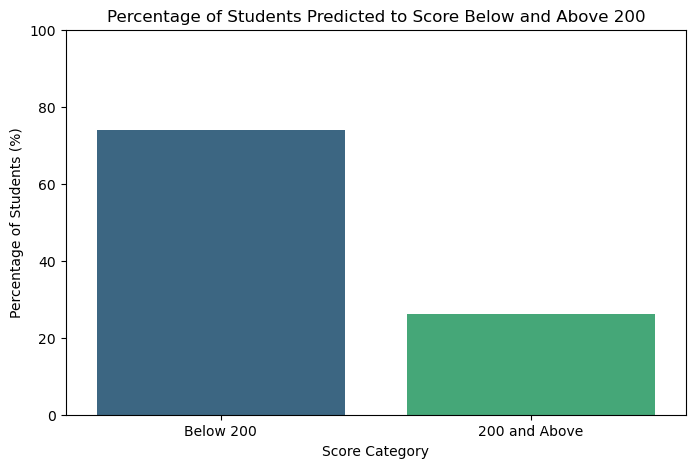

In [140]:
total_students = student_jamb.shape[0]
students_below_200 = at_risk_students.shape[0]
students_above_200 = total_students - students_below_200


data = {
    'Score Category': ['Below 200', '200 and Above'],
    'Number of Students': [students_below_200, students_above_200]
}

summary_df = pd.DataFrame(data)

summary_df['Percentage'] = (summary_df['Number of Students'] / total_students) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x='Score Category', y='Percentage', data=summary_df, palette='viridis')
plt.title('Percentage of Students Predicted to Score Below and Above 200')
plt.xlabel('Score Category')
plt.ylabel('Percentage of Students (%)')
plt.ylim(0, 100)
plt.show()

                         Discipline_ID  Average_Synthetic_Score  Study_Hours  \
Discipline_ID                 1.000000                 0.689596    -0.037251   
Average_Synthetic_Score       0.689596                 1.000000     0.024241   
Study_Hours                  -0.037251                 0.024241     1.000000   
Struggle_Scale               -0.025774                -0.070532     0.053159   
Class_Enjoyment              -0.001763                 0.040621    -0.014473   
Attendance_Rate               0.090324                 0.105435    -0.110878   
Understanding_Level           0.016880                 0.007069     0.043970   
Parent_Income_Level_Num       0.054116                 0.055522    -0.072140   
Disability_Num               -0.074335                -0.106164    -0.056885   
Avg_JAMB_Score               -0.167982                 0.244391    -0.081974   
Synthetic_JAMB_Score          0.624683                 0.988073     0.010720   
Predicted_JAMB_Score          0.660872  

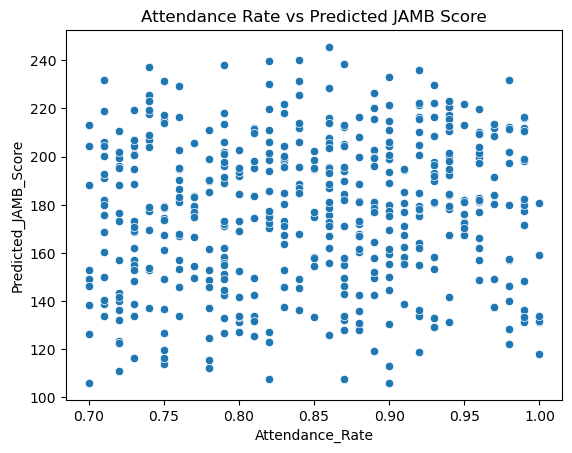

In [106]:

numeric_student_jamb = student_jamb.select_dtypes(include=[np.number])

correlation_matrix = numeric_student_jamb.corr()

print(correlation_matrix)



sns.scatterplot(x='Attendance_Rate', y='Predicted_JAMB_Score', data=student_jamb)
plt.title('Attendance Rate vs Predicted JAMB Score')
plt.show()


In [107]:
correlation_matrix

Discipline_ID  Average_Synthetic_Score  Study_Hours  \
Discipline_ID                 1.000000                 0.689596    -0.037251   
Average_Synthetic_Score       0.689596                 1.000000     0.024241   
Study_Hours                  -0.037251                 0.024241     1.000000   
Struggle_Scale               -0.025774                -0.070532     0.053159   
Class_Enjoyment              -0.001763                 0.040621    -0.014473   
Attendance_Rate               0.090324                 0.105435    -0.110878   
Understanding_Level           0.016880                 0.007069     0.043970   
Parent_Income_Level_Num       0.054116                 0.055522    -0.072140   
Disability_Num               -0.074335                -0.106164    -0.056885   
Avg_JAMB_Score               -0.167982                 0.244391    -0.081974   
Synthetic_JAMB_Score          0.624683                 0.988073     0.010720   
Predicted_JAMB_Score          0.660872                 0.995337     0.021241   

                         Struggle_Scale  Class_Enjoyment  Attendance_Rate  \
Discipline_ID                 -0.025774    -1.763008e-03         0.090324   
Average_Synthetic_Score       -0.070532     4.062102e-02         0.105435   
Study_Hours                    0.053159    -1.447310e-02        -0.110878   
Struggle_Scale                 1.000000     3.117962e-02         0.023623   
Class_Enjoyment                0.031180     1.000000e+00         0.077156   
Attendance_Rate                0.023623     7.715640e-02         1.000000   
Understanding_Level           -0.001493     1.996565e-02         0.026751   
Parent_Income_Level_Num        0.014998    -3.755886e-16         0.079892   
Disability_Num                 0.036028    -4.317508e-02         0.005933   
Avg_JAMB_Score                 0.052591     5.357053e-02         0.019948   
Synthetic_JAMB_Score          -0.059265     4.726388e-02         0.101442   
Predicted_JAMB_Score          -0.059554     4.198929e-02         0.098964   

                         Understanding_Level  Parent_Income_Level_Num  \
Discipline_ID                       0.016880             5.411639e-02   
Average_Synthetic_Score             0.007069             5.552164e-02   
Study_Hours                         0.043970            -7.214042e-02   
Struggle_Scale                     -0.001493             1.499823e-02   
Class_Enjoyment                     0.019966            -3.755886e-16   
Attendance_Rate                     0.026751             7.989192e-02   
Understanding_Level                 1.000000             3.396694e-02   
Parent_Income_Level_Num             0.033967             1.000000e+00   
Disability_Num                      0.057334            -6.371539e-02   
Avg_JAMB_Score                     -0.021490             1.080769e-02   
Synthetic_JAMB_Score                0.004137             5.393571e-02   
Predicted_JAMB_Score                0.006063             4.996961e-02   

                         Disability_Num  Avg_JAMB_Score  Synthetic_JAMB_Score  \
Discipline_ID                 -0.074335       -0.167982              0.624683   
Average_Synthetic_Score       -0.106164        0.244391              0.988073   
Study_Hours                   -0.056885       -0.081974              0.010720   
Struggle_Scale                 0.036028        0.052591             -0.059265   
Class_Enjoyment               -0.043175        0.053571              0.047264   
Attendance_Rate                0.005933        0.019948              0.101442   
Understanding_Level            0.057334       -0.021490              0.004137   
Parent_Income_Level_Num       -0.063715        0.010808              0.053936   
Disability_Num                 1.000000       -0.045761             -0.107300   
Avg_JAMB_Score                -0.045761        1.000000              0.389951   
Synthetic_JAMB_Score          -0.107300        0.389951              1.000000   
Predicted_JAMB_Score          -0.102491        0.314219     